## Prediction of the energy consumption of a quadricopter UAV

Authors:

* BONNAS Lucas
* OLIVEIRA Bruno Richard

### Summary

- 1. Introduction
    - 1.1. Context
    - 1.2. Objective
- 2. Data Analysis
    - 2.1. Variables Analysis
    - 2.2. Importing Libraries and DataFrames
- 3. Data Preparation
    - 3.1. Data Selection
    - 3.2. Selecting Parameters
    - 3.3. Data Resampling
    - 3.4. Power Filtering
    - 3.5. Data Filtering
    - 3.6. Selecting Variables for Analysis
- 4. Model Training
    - 4.1. Model Selection and Evaluation
    - 4.2. Hyperparameter Tuning for Model Optimization
        - 4.2.1. Random Forest

# 1. Introduction

## 1.1. Context

The data used in this study was extracted from the paper *"In-flight positional and energy use data set of a DJI Matrice 100 quadcopter for small package delivery"*, which describes the collection of information on the operation of a multirotor drone used for package delivery. A total of 209 autonomous flights were performed with a DJI Matrice 100 quadcopter, varying operational parameters to study their impact on the vehicle's energy consumption.

The drone was equipped with high-precision sensors, including GPS, an IMU (Inertial Measurement Unit), voltage and current sensors, and an ultrasonic anemometer, enabling the collection of detailed data on flight conditions such as wind speed, inertial states, and power consumption. During the flights, operational parameters such as commanded ground speed, payload, and cruise altitude were varied to provide a comprehensive dataset. The data covered a total flight time of 10 hours and 45 minutes, covering approximately 65 kilometers between April and October of 2019.

## 1.2. Objective

Based on this data, the main objective of this work is to develop a predictive model for the energy consumption of a multirotor UAV, considering variables such as wind speed, ground speed, acceleration, and payload. The prediction model aims to identify patterns between these parameters and energy consumption, which could improve drone operational efficiency, optimize battery management, and provide more accurate information for flight planning and UAV design.

The **learning objective**, therefore, is to predict the energy consumption of the UAV based on the operational and environmental conditions of each flight. To achieve this, it is crucial to understand how the variables affect the drone's energy demand during flight, with the goal of improving energy efficiency and ensuring the optimal performance of drones in package delivery missions.

# 2. Data Analysis

In any predictive modeling task, understanding the relationships between input features and the target variable is a critical step. In this study, the goal is to predict the energy consumption of a multirotor UAV, which depends on several operational and environmental factors. To achieve this, an in-depth analysis of the variables collected during the flights is necessary. This analysis allows us to identify which factors have the most significant impact on the energy consumption of the drone and how they interact with each other.

The variables under consideration include both internal measurements (such as battery voltage and current, vehicle speed, and acceleration) and external factors (like wind speed and angle, which can significantly influence power consumption). By investigating the behavior and distribution of these variables, we can better understand how each one contributes to the energy demands of the UAV during flight.

The importance of this analysis lies in its ability to inform the development of a more accurate and efficient predictive model. By identifying key features that strongly correlate with energy consumption, we can streamline the modeling process, focusing on the most relevant variables and potentially eliminating those that do not contribute significantly to the prediction. Additionally, understanding how these variables influence energy usage can provide valuable insights for UAV design improvements, optimization of operational parameters, and better flight planning, ultimately leading to more energy-efficient and longer-lasting drone missions.

## 2.1. Variables Analysis

The table below presents all the variables provided in the dataset collected during the UAV flights:

| **Variable**           | **Unit/Format** | **Description**                                                        |
|------------------------|-----------------|------------------------------------------------------------------------|
| flight                 | Integer         | Code of the flight performed.                                          |
| speed                  | m/s             | Programmed horizontal ground speed during cruise.                      |
| payload                | g               | Mass of the payload attached to aircraft.                              |
| altitude               | m               | Programmed altitude.                                                   |
| date                   | YYYY-MM-DD      | When the flight was conducted.                                         |
| local_time             | 24:00 h         | Time of the day when the flight started.                               |
| route                  | String          | Predefined path followed by the aircraft.                              |
| time                   | s               | Time elapsed in flight.                                                |
| wind_speed             | m/s             | Airspeed provided by the anemometer.                                   |
| wind_angle             | deg             | Direction of the air with respect to the north (CW).                   |
| battery_voltage        | V               | System voltage measured immediately after the battery.                 |
| battery_current        | A               | System current measured immediately after the battery.                 |
| position_x             | deg             | Longitude of the aircraft.                                             |
| position_y             | deg             | Latitude of the aircraft.                                              |
| position_z             | deg             | Altitude of the aircraft with respect to the sea level.                |
| orientation_x, _y, _z, _w | quaternion      | Aircraft orientation.                                                  |
| velocity_x, _y, _z      | m/s             | Ground speed.                                                          |
| angular_x, _y, _z       | rad/s           | Angular rate.                                                          |
| linear_acceleration_x, _y, _z | m/s²         | Ground acceleration.                                                   |

## 2.2. Importing Libraries and DataFrames

In order to begin the analysis, the first step is to import the necessary libraries and load the datasets. For this task, we will use several Python libraries that are essential for data manipulation, analysis, and visualization.

The primary libraries include:

* **Pandas** for handling and analyzing the data, specifically for working with DataFrames, which allows us to efficiently process the large dataset.
* **NumPy** for numerical operations, especially when dealing with arrays and matrices.
* **Matplotlib** and **Seaborn** for data visualization, enabling us to create informative plots and graphs to understand trends, relationships, and distributions in the data. Seaborn, in particular, offers advanced statistical plots that are valuable for visualizing complex patterns.

Once the necessary libraries are imported, the next step is to load the DataFrames. These DataFrames represent the data collected during the UAV flights. The data is typically stored in CSV files, which are read into the program using the Pandas read_csv() function. After loading the data, we will explore and preprocess the dataset to ensure it is clean and ready for analysis.

By importing these libraries and data, we lay the foundation for performing the detailed analysis and modeling necessary to predict the energy consumption of the UAV.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Prevent error messages related to data copying in Pandas and warnings 
import warnings
warnings.filterwarnings('ignore')
pd.options.mode.copy_on_write = True

In [3]:
# Importing and showing the first lines of parameters dataframe
df_param = pd.read_csv('Data_Mini_Projet_DATA_2025/parameters.csv')
df_param.head()

,flight,speed,payload,altitude,date,local_time,route
0,1,4.0,0.0,25,2019-04-07,10:13,R5
1,2,4.0,0.0,50,2019-04-07,10:23,R5
2,3,6.0,0.0,25,2019-04-07,10:33,R5
3,4,8.0,0.0,25,2019-04-07,10:48,R5
4,5,4.0,0.0,25,2019-04-07,11:05,R2


In [4]:
# Importing and showing the first lines of data dataframe
df_flights_original = pd.read_csv('Data_Mini_Projet_DATA_2025/flights.csv', low_memory=False)
df_flights_original.head()

,flight,time,wind_speed,wind_angle,battery_voltage,battery_current,position_x,position_y,position_z,orientation_x,...,angular_z,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,speed,payload,altitude,date,time_day,route
0,1,0.0,0.1,12.0,24.222174,0.087470,-79.782396,40.458047,269.332402,0.001772,...,0.006815,0.004258,-0.120405,-9.811137,4.0,0.0,25,2019-04-07,10:13,R5
1,1,0.2,0.1,3.0,24.227180,0.095421,-79.782396,40.458047,269.332056,0.001768,...,0.002034,0.006175,-0.116397,-9.810392,4.0,0.0,25,2019-04-07,10:13,R5
2,1,0.3,0.1,352.0,24.225929,0.095421,-79.782396,40.458047,269.333081,0.001768,...,-0.000874,0.002696,-0.128592,-9.809440,4.0,0.0,25,2019-04-07,10:13,R5
3,1,0.5,0.1,354.0,24.224678,0.095421,-79.782396,40.458047,269.334648,0.001775,...,0.002443,0.002024,-0.128271,-9.810159,4.0,0.0,25,2019-04-07,10:13,R5
4,1,0.6,0.1,359.0,24.210905,0.079518,-79.782396,40.458047,269.336178,0.001775,...,-0.006425,0.008271,-0.119890,-9.812125,4.0,0.0,25,2019-04-07,10:13,R5


In [5]:
# Create a copy from the original df
df_flights = df_flights_original

# 3. Data Preparation

Data preparation is a crucial step in any data analysis or machine learning project. Before building predictive models, it is essential to ensure that the dataset is clean, structured, and formatted properly. This step involves several tasks, such as checking for missing values, correcting data types, and identifying any inconsistencies that could affect the model's performance.

In this process, it is important to not only examine the data for quality but also to understand the relationships between the different variables. For instance, ensuring that the time-related columns are properly formatted is critical, as time plays a significant role in understanding flight scenarios and predicting energy consumption patterns. Additionally, we need to assess whether any unnecessary columns are present and remove them to simplify the dataset, making the analysis more efficient.

The data preparation stage directly influences the quality of the models that will be built later on. Clean, well-organized data leads to more accurate and reliable predictions, while improperly prepared data can lead to misleading results and poor model performance. Therefore, thorough data cleaning and preprocessing are essential to ensure that the data serves as a solid foundation for the subsequent modeling steps.

In [6]:
df_flights.info()
df_flights.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257896 entries, 0 to 257895
Data columns (total 28 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   flight                 257896 non-null  int64  
 1   time                   257896 non-null  float64
 2   wind_speed             257896 non-null  float64
 3   wind_angle             257896 non-null  float64
 4   battery_voltage        257896 non-null  float64
 5   battery_current        257896 non-null  float64
 6   position_x             257896 non-null  float64
 7   position_y             257896 non-null  float64
 8   position_z             257896 non-null  float64
 9   orientation_x          257896 non-null  float64
 10  orientation_y          257896 non-null  float64
 11  orientation_z          257896 non-null  float64
 12  orientation_w          257896 non-null  float64
 13  velocity_x             257896 non-null  float64
 14  velocity_y             257896 non-nu

,flight,time,wind_speed,wind_angle,battery_voltage,battery_current,position_x,position_y,position_z,orientation_x,...,velocity_y,velocity_z,angular_x,angular_y,angular_z,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,speed,payload
count,257896.000000,257896.000000,257896.000000,257896.000000,257896.000000,257896.000000,257896.000000,257896.000000,257896.000000,257896.000000,...,257896.000000,257896.000000,257896.000000,257896.000000,257896.000000,257896.000000,257896.000000,257896.000000,257896.000000,257896.000000
mean,162.445513,97.766940,4.337992,169.470760,22.435459,17.932477,-77.773754,39.438805,295.812932,-0.010096,...,2.273353,0.296500,-0.001222,0.000121,0.028713,-0.317346,0.017140,-9.795682,7.325116,240.937238
std,71.445026,62.667401,3.494649,101.176006,1.200742,10.865654,12.506800,6.342148,58.305928,0.047414,...,3.294641,1.459703,0.116713,0.175669,0.251162,0.772273,0.460883,0.462295,3.209065,211.373066
min,1.000000,0.000000,0.000000,0.000000,18.810810,-0.326023,-79.946543,0.000000,0.000000,-0.546413,...,-4.230620,-4.015751,-2.279608,-3.674915,-1.857536,-5.889537,-9.108024,-22.687924,0.000000,0.000000
25%,112.000000,46.200000,1.500000,80.000000,21.513987,7.140693,-79.782786,40.458878,271.311215,-0.023949,...,0.000000,-0.143707,-0.043230,-0.038335,-0.040691,-0.691028,-0.203128,-9.895812,4.000000,0.000000
50%,166.000000,93.000000,3.300000,177.000000,22.306536,21.923040,-79.782747,40.458994,292.120051,-0.001910,...,0.064984,0.028842,-0.000317,0.000070,0.001101,-0.052744,0.010875,-9.801070,8.000000,250.000000
75%,223.000000,141.400000,6.500000,244.000000,23.162939,25.270737,-79.782259,40.459057,325.245442,0.010370,...,4.010875,0.850420,0.041166,0.040656,0.051446,0.179579,0.227538,-9.661465,10.000000,500.000000
max,279.000000,428.290000,18.100000,359.000000,25.894913,47.193779,0.000000,40.459682,376.188721,0.414962,...,12.703530,5.842570,3.022839,2.833664,2.172410,4.647753,7.139876,-3.830504,12.000000,750.000000


First, we conducted a thorough check for duplicate entries and missing data in the dataset. Duplicate rows can skew results and lead to inaccurate predictions, so they were identified and removed if necessary. For missing values, we checked if there were any gaps in the data that could affect the integrity of our analysis. If any missing values were found, they were addressed through interpolation or by excluding problematic rows, ensuring that the dataset remains robust for future modeling.

In [7]:
print(f'Duplicated rows: {df_flights.duplicated().sum()}')
print(f'Missing data proportion: {df_flights.isnull().mean().mean():.2%}')

Duplicated rows: 0
Missing data proportion: 0.00%


After evaluating the dataset, we found that there are no duplicate entries or missing data. This indicates that the data is clean and ready for further analysis. Now we can check if any flight has insufficient data for analysis.

In [8]:
# 1. Count the number of rows per flight
flight_counts = df_flights.groupby('flight').size().reset_index(name='count')

#2. Calculate the average number of rows per flight
average_lines = flight_counts['count'].mean()
print(f"Average number of lines per flight: {average_lines:.2f}")

# 3. Set the threshold (60%)
threshold = 0.60 * average_lines
print(f"Cut-off threshold (60% of average): {threshold:.2f}")

#4. Identify flights with fewer rows than the limit
flights_to_remove = flight_counts[flight_counts['count'] < threshold]['flight']
print(f"Flights to be removed (less than 60% of the average): {list(flights_to_remove)}")

#5. Remove these flights from the original DataFrame
df_flights_clean = df_flights[~df_flights['flight'].isin(flights_to_remove)].reset_index(drop=True)

print(f"Total flights before: {df_flights['flight'].nunique()}")
print(f"Total flights after cleaning: {df_flights_clean['flight'].nunique()}")

df_flights = df_flights_clean

Average number of lines per flight: 1233.95
Cut-off threshold (60% of average): 740.37
Flights to be removed (less than 60% of the average): [14, 213, 215, 216]
Total flights before: 209
Total flights after cleaning: 205


To ensure data quality and prevent bias caused by flights with insufficient samples, a filtering process was applied based on the distribution of records per flight. The average number of records per flight was 1233.95, and a threshold of 60% of this average (740.37 records) was established. Flights with fewer than 740 records were removed from the dataset, as they might not provide enough information for reliable modeling. As a result, four flights (14, 213, 215, and 216) were excluded, reducing the total number of flights from 209 to 205 while maintaining the integrity and representativeness of the data.

## 3.1. Data Selection

The first step in the analysis involves understanding the different flight routes performed by the drone. The routes are categorized as follows:

* **R1 to R7** = full flights completing a cruise movement;
* **A1** = Ancillary ground test with no propellers and no motor movement;
* **A2** = Ancillary ground test with no propellers and minimum movement; 
* **A3** = Ancillary ground test with propellers and minimum movement;
* **H** = Hover test with no horizontal movement.

Given the goal of predicting energy consumption during real flights, we will filter out the "A" routes, which correspond to various ground tests (with or without motor operation), and the "H" route, which is a hover test without horizontal movement.

In [9]:
# List of routes to remove
routes_to_remove = ['A1', 'A2', 'A3', 'H']

# Remove rows where 'route' is in the list of test routes
df_flights = df_flights[~df_flights['route'].isin(routes_to_remove)].reset_index(drop=True)

As part of the data preparation process, we derived a new variable of interest, power, which is essential for energy consumption analysis. Power was calculated using the formula:

$$P = V * I$$

This new variable allows us to directly assess the energy consumption associated with each flight scenario, providing a more meaningful measure for subsequent predictive modeling. The inclusion of power as a key feature aligns with the goal of analyzing energy efficiency and consumption patterns in the dataset.

In [10]:
# Calculate power
df_flights['power'] = df_flights['battery_voltage'] * df_flights['battery_current']

And now analyzing the power variable to look for possible inconsistencies.

In [11]:
# Calculate the proportion of negative values
negative_power_proportion = (df_flights['power'] < 0).sum() / len(df_flights)
print(f"Proportion of negative 'power' values: {negative_power_proportion:.4f}")

Proportion of negative 'power' values: 0.1072


The proportion of negative 'power' values in the dataset is 10.72%. While this might initially appear to be an anomaly, a deeper analysis of the data reveals that these negative values occur primarily at the beginning and end of the flights. This phenomenon is likely due to negative current values, which can be attributed to regenerative braking or motor braking mechanisms. During these phases, the aircraft may experience a reversal in power flow, where energy is fed back into the system instead of being consumed. Given that this behavior aligns with expected physical principles, these values will be retained in the dataset to preserve the accuracy and integrity of the model.


## 3.2. Selecting Parameters

In relation to the dataframe parameters, We will retain only the flight parameter while removing the columns ['speed', 'altitude', 'date', 'time_day', 'route']. Although speed and altitude are important parameters, the dataset already includes sensor-measured variables for these factors, which provide more precise data for the learning model. The time_day and date columns will be excluded because they do not serve as direct time measurements relevant to the analysis. The route parameter is also not necessary, as test routes have already been removed from the dataset. However, the flight parameter will be retained to allow for proper data segmentation and facilitate the analysis of variables such as power and other flight-related metrics.

In [12]:
columns_to_exclude = ['speed', 'altitude', 'date', 'time_day', 'route']
df_flights = df_flights.drop(columns=columns_to_exclude)

For this analysis, we have selected three flights with distinct combinations of parameters from the original dataset to examine how the power variable behaves in different flight scenarios. These flights represent varying conditions such as speed, altitude, and payload, which can significantly influence the dynamics of the system and the power consumption during flight.

* **Flight 1:** Speed = 4 ms, Altitude = 25 m, Payload = 0 g
* **Flight 2:** Speed = 6 ms, Altitude = 50 m, Payload = 250 g
* **Flight 3:** Speed = 12 ms, Altitude = 75 m, Payload = 500 g

By choosing these specific flights, we are able to analyze the power data across three different flight conditions, each with varying parameters. This will help us understand how changes in speed, altitude, and payload impact the power consumption and provide valuable insights into the relationship between these variables.

We will plot the power values in relation to time for each of these selected flights, allowing for a clear visual comparison of how the power demand changes under these different scenarios. This approach gives us a deeper understanding of the behavior of the system under varying conditions and helps inform the design and training of machine learning models, ensuring they account for diverse flight profiles.

In [13]:
# Select 3 flights with different speed, altitude and payload conditions
flight_1 = df_flights_original[(df_flights_original['speed'] == 4.0) & (df_flights_original['altitude'] == '25') & (df_flights_original['payload'] == 0.0)]
flight_2 = df_flights_original[(df_flights_original['speed'] == 6.0) & (df_flights_original['altitude'] == '50') & (df_flights_original['payload'] == 250.0)]
flight_3 = df_flights_original[(df_flights_original['speed'] == 12.0) & (df_flights_original['altitude'] == '75') & (df_flights_original['payload'] == 500.0)]

print(f"Flight 1: {flight_1['flight'].unique()}")
print(f"Flight 2: {flight_2['flight'].unique()}")
print(f"Flight 3: {flight_3['flight'].unique()}")

Flight 1: [1 5 6 7 8]
Flight 2: [154 181 261]
Flight 3: [ 92 129 252]


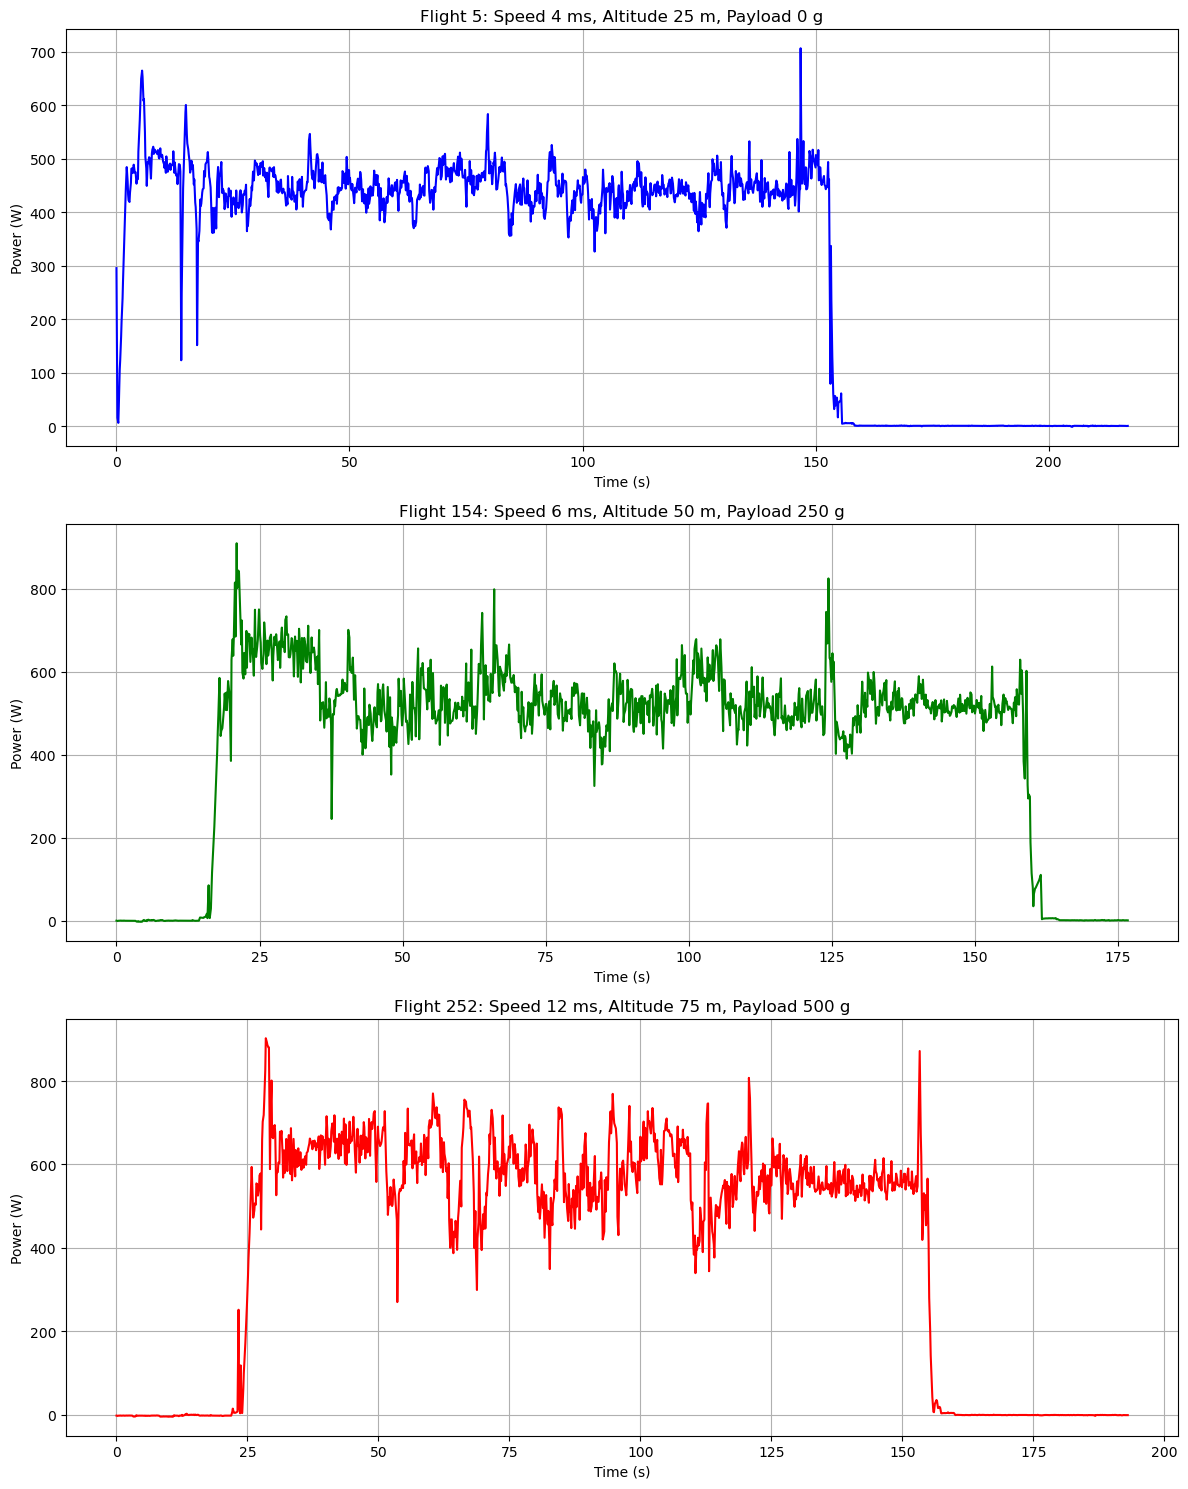

In [14]:
# Select flights for analysis
flight_5 = df_flights[df_flights['flight'] == 5]
flight_154 = df_flights[df_flights['flight'] == 154]
flight_252 = df_flights[df_flights['flight'] == 252]

# Creating the subplot graph
fig, axs = plt.subplots(3, 1, figsize=(12, 15))

# Plotting the flight 5
axs[0].plot(flight_5['time'], flight_5['power'], color='blue')
axs[0].set_title('Flight 5: Speed 4 ms, Altitude 25 m, Payload 0 g')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Power (W)')
axs[0].grid(True)

# Plotting the flight 154
axs[1].plot(flight_154['time'], flight_154['power'], color='green')
axs[1].set_title('Flight 154: Speed 6 ms, Altitude 50 m, Payload 250 g')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Power (W)')
axs[1].grid(True)

# Plotting the flight 252
axs[2].plot(flight_252['time'], flight_252['power'], color='red')
axs[2].set_title('Flight 252: Speed 12 ms, Altitude 75 m, Payload 500 g')
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Power (W)')
axs[2].grid(True)

# Show the graphs
plt.tight_layout()
plt.show()

Upon plotting the power consumption data, we observed significant fluctuations. Several factors contribute to this variability:

1. **Sensor Noise and Measurement Errors:** Imperfections in the onboard sensors can lead to small inaccuracies in the readings, introducing noise into the data.

2. **Environmental Conditions:** Changes in wind speed, direction, and air density can cause fluctuations in power usage, as the drone adjusts its power to overcome these factors.

3. **Dynamic Flight Conditions:** Rapid movements like acceleration, deceleration, or sharp turns increase power consumption temporarily.

4. **Data Sampling and Averaging:** Irregular sampling or insufficient resolution can cause the data to appear noisy, though averaging can help smooth the results.

Understanding these factors helps explain the data's fluctuations and is essential for improving preprocessing and prediction models.

## 3.3. Data Resampling

In the raw dataset, the time intervals between recorded measurements are irregular, meaning that the variables are not sampled at a consistent rate. This non-uniformity can negatively impact the training of machine learning models, as they perform better when the input data has a structured and consistent temporal resolution. Resampling is crucial to standardizing the dataset, ensuring that each flight has measurements at evenly spaced time intervals.

For this reason, we will apply a resampling process based on time, ensuring that all flights have a fixed time step of 0.2 seconds between each observation. This choice is based on the fact that the data was originally collected at 5 Hz (5 measurements per second). By enforcing a uniform time step, we improve the consistency of the dataset, making it more suitable for learning patterns and trends in the data.

Additionally, during the resampling process, some missing values may arise due to the creation of new time steps where no original measurement was recorded. To handle this, we will apply linear interpolation, which estimates missing values by considering adjacent points. This approach helps smooth the dataset without introducing sudden jumps or distortions.

By implementing this resampling strategy, we ensure that the model receives structured input data, reducing noise caused by irregular sampling intervals and improving its ability to generalize and make accurate predictions.

In [15]:
# Create a copy to analyse without filtering
df_clean = df_flights

# List to store the DataFrames
all_resampled_data = []

# Iterating over each 'flight_scenario'
for flight in df_flights['flight'].unique():
    # Filter the data for the specific 'flight_scenario'
    df_filtered = df_flights[df_flights['flight'] == flight]

    # Converting 'time' to TimedeltaIndex
    df_filtered['time'] = pd.to_timedelta(df_filtered['time'], unit='s')       

    # Sorting data by 'time'
    df_filtered = df_filtered.sort_index()

    # Setting 'time' as index
    df_filtered = df_filtered.set_index('time')

    # Resampling to 0.2s (fs = 5 Hz)
    df_filtered_resampled = df_filtered.resample('0.2s').mean()

    # Interpolation to fill NaN values
    df_filtered_resampled = df_filtered_resampled.interpolate(method='linear')

    # Transform the timedelta index (time) back to the normal seconds format
    df_filtered_resampled['time'] = df_filtered_resampled.index.total_seconds()

    # Resetting the index (if you want the index to be sequential)
    df_filtered_resampled = df_filtered_resampled.reset_index(drop=True)

    # Add the resampled DataFrame to the list
    all_resampled_data.append(df_filtered_resampled)

# Concatenating all DataFrames in the list
df_flights = pd.concat(all_resampled_data)

## 3.4. Power Filtering

After the resampling process, the next crucial step in our data preprocessing is data filtering. Filtering plays an essential role in removing high-frequency noise from the data, particularly for the power and sensor measurements. These high-frequency fluctuations might be caused by sensor errors or external disturbances that are not relevant to the analysis and could negatively impact the model's performance by introducing unnecessary variance.

In this context, we will apply a low-pass filter, which is designed to allow signals with frequencies below a specified cutoff frequency to pass through, while attenuating frequencies higher than this threshold. By using this low-pass filter, we can smooth the data and focus on the relevant trends and patterns, removing the unwanted high-frequency noise that might obscure the underlying signal. This is especially important when working with time-series data like ours, where the noise could interfere with the identification of meaningful relationships between variables such as power, speed, and altitude.

To better understand the filtering process and to verify its effectiveness, we will also plot the frequency spectrum of the data before and after filtering. This will help us visualize how much of the signal’s energy is contained at different frequencies and how the low-pass filter has removed higher-frequency noise.

The selected parameters for the filter are:

* **Cutoff frequency (cutOff = 2 rad/s):** Determines the maximum frequency allowed to pass through the filter while attenuating higher frequencies.
* **Sampling frequency (fs = 5 Hz):** Given in the original dataset, it represents the rate at which data points were collected.
* **Filter order (order = 3):** Defines the steepness of the transition between the passband and the stopband. A higher order results in a sharper cutoff.

In [16]:
# Low-pass filter functions
from scipy.signal import butter, filtfilt

def butter_lowpass_filter(data, cutOff, fs, order):
    nyq = 0.5 * fs 
    normal_cutoff = cutOff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

cutOff = 2 # Cutoff frequency in Hz
fs = 5 # Sampling frequency in Hz
order = 3 # Order of filter

In [17]:
# Apply low pass filter to voltage and current separately
df_flights['battery_voltage_LPF'] = butter_lowpass_filter(df_flights['battery_voltage'], cutOff, fs, order)
df_flights['battery_current_LPF'] = butter_lowpass_filter(df_flights['battery_current'], cutOff, fs, order)

# Calculate power with filtered values
df_flights['power_LPF'] = df_flights['battery_voltage_LPF'] * df_flights['battery_current_LPF']

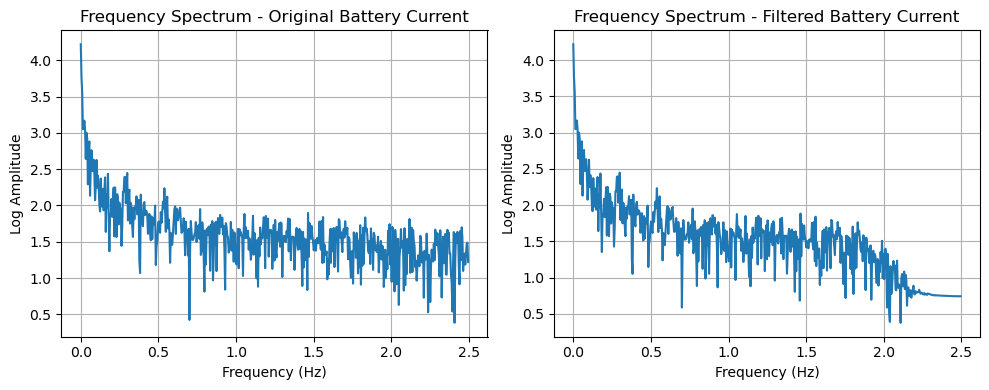

In [18]:
from scipy.fft import fft

# Select flights for analysis
flight_5 = df_flights[df_flights['flight'] == 5]

# Set the sampling interval
sampling_interval = 0.2 

# Apply FFT to original and filtered stream
original_current = flight_5['battery_current']
filtered_current = flight_5['battery_current_LPF']

# Calculating FFT
fft_original = fft(original_current)
fft_filtered = fft(filtered_current)

# Setting the corresponding frequency
n = len(original_current)  
frequencies = np.fft.fftfreq(n, d=sampling_interval)  # Associated frequencies

# Plotting the frequency spectra for the two current series
plt.figure(figsize=(10, 4))

# Spectrum of the original current (log scale)
plt.subplot(1, 2, 1)
plt.plot(frequencies[:n // 2], np.log10(np.abs(fft_original)[:n // 2] + 1))  # +1 to avoid log(0)
plt.title('Frequency Spectrum - Original Battery Current')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Log Amplitude')
plt.grid(True)

# Filtered current spectrum (log scale)
plt.subplot(1, 2, 2)
plt.plot(frequencies[:n // 2], np.log10(np.abs(fft_filtered)[:n // 2] + 1))  # +1 to avoid log(0)
plt.title('Frequency Spectrum - Filtered Battery Current')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Log Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()

After applying the low-pass filter with a cutoff frequency of 2 Hz, the graph shows a significant reduction in high-frequency noise in the battery current signal. The filtered signal became smoother, preserving low-frequency fluctuations while removing unwanted components, likely caused by noise or interference.

This filtering is crucial for improving data quality and model accuracy, as it helps reduce model complexity by removing noise, allowing the algorithm to focus on relevant current variations. This ensures more reliable analysis and facilitates the development of a more robust model.

Next, we will plot the power data for the three selected flights to demonstrate the effect of the re-sampling and the low-pass filtering process. The first plot will show the power data before and after re-sampling, illustrating the regularization of the time intervals between samples. The second plot will show the power data after the application of the low-pass filter, highlighting how the filtering process smooths the signal and removes high-frequency noise, providing a clearer representation of the underlying trends in the power data.

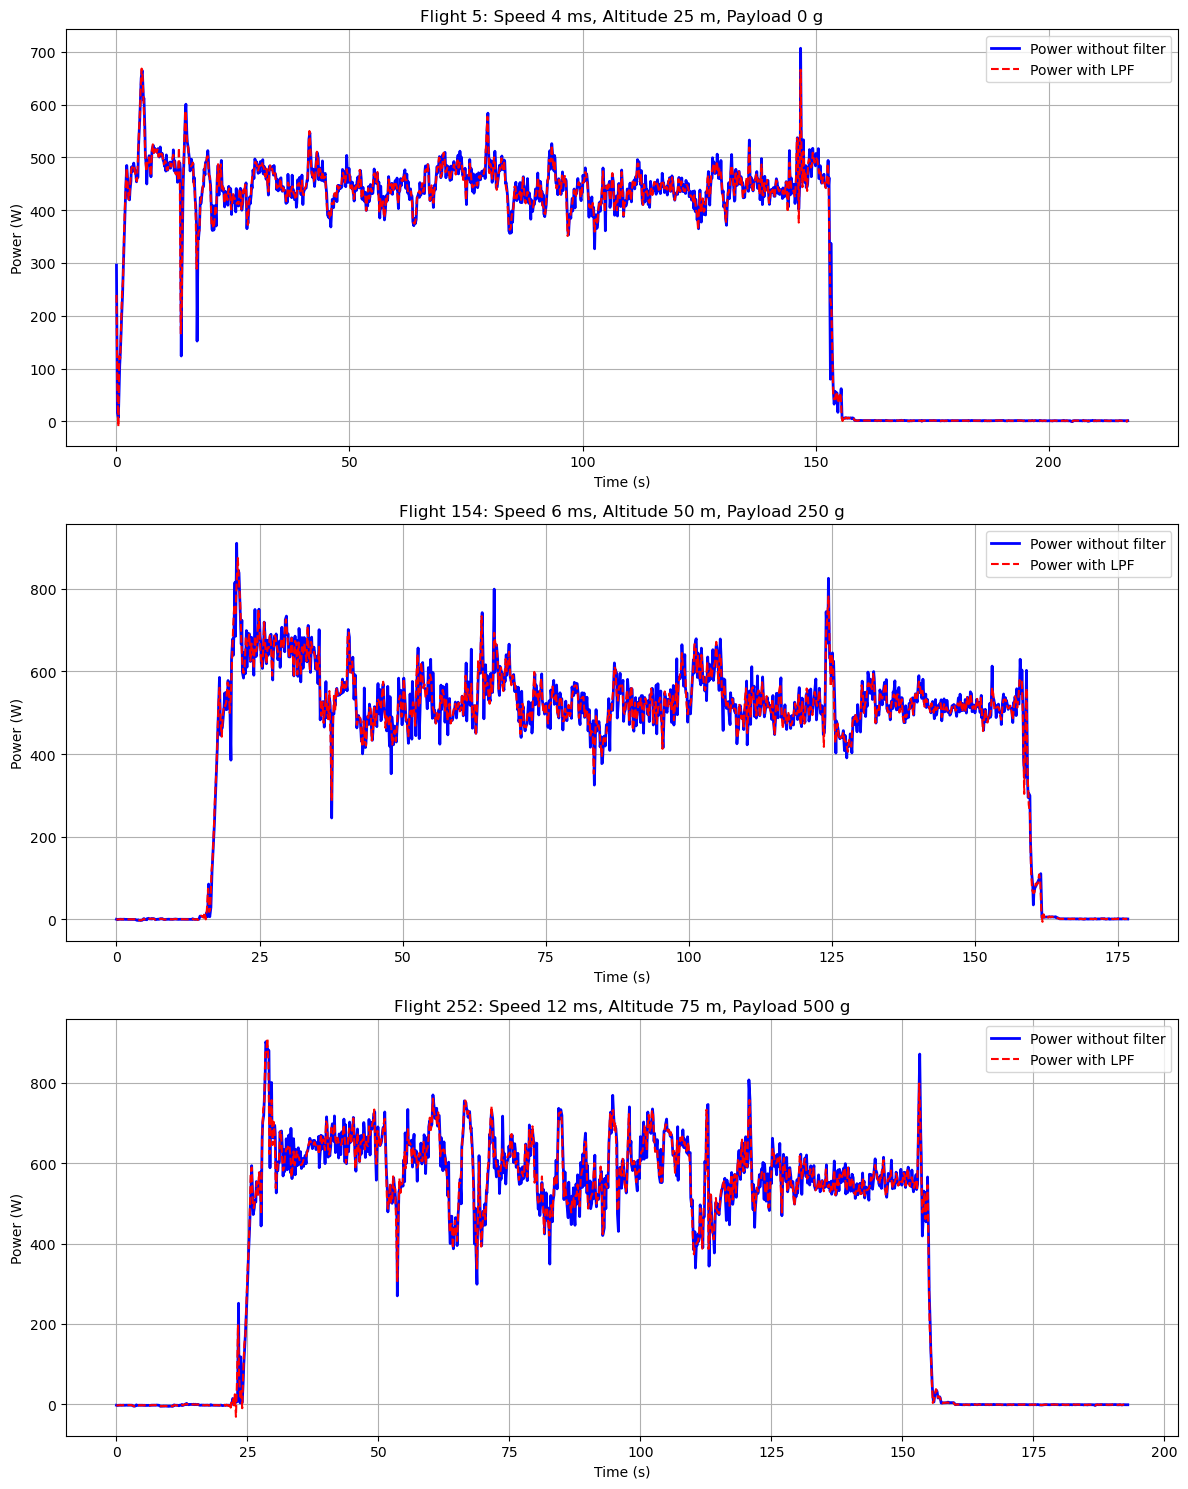

In [19]:
# Select flights for analysis
# Without filtering
flight_5_clean = df_clean[df_clean['flight'] == 5]
flight_154_clean = df_clean[df_clean['flight'] == 154]
flight_252_clean = df_clean[df_clean['flight'] == 252]
# With filtering
flight_5 = df_flights[df_flights['flight'] == 5]
flight_154 = df_flights[df_flights['flight'] == 154]
flight_252 = df_flights[df_flights['flight'] == 252]

# Creating the subplot graph
fig, axs = plt.subplots(3, 1, figsize=(12, 15))

# Flight 5
axs[0].plot(flight_5_clean['time'], flight_5_clean['power'], label='Power without filter', color='blue', linewidth=2)
axs[0].plot(flight_5['time'], flight_5['power_LPF'], label='Power with LPF', color='red', ls='--')
axs[0].set_title('Flight 5: Speed 4 ms, Altitude 25 m, Payload 0 g')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Power (W)')
axs[0].grid(True)
axs[0].legend()

# Flight 154
axs[1].plot(flight_154_clean['time'], flight_154_clean['power'], label='Power without filter', color='blue', linewidth=2)
axs[1].plot(flight_154['time'], flight_154['power_LPF'], label='Power with LPF', color='red', ls='--')
axs[1].set_title('Flight 154: Speed 6 ms, Altitude 50 m, Payload 250 g')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Power (W)')
axs[1].grid(True)
axs[1].legend()

# Flight 252
axs[2].plot(flight_252_clean['time'], flight_252_clean['power'], label='Power without filter', color='blue', linewidth=2)
axs[2].plot(flight_252['time'], flight_252['power_LPF'], label='Power with LPF', color='red', ls='--')
axs[2].set_title('Flight 252: Speed 12 ms, Altitude 75 m, Payload 500 g')
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Power (W)')
axs[2].grid(True)
axs[2].legend()

# Show the graphs
plt.tight_layout()
plt.show()

In [20]:
original_std = np.std(flight_154_clean['power'])
filtered_std = np.std(flight_154['power_LPF'])

print(f'Original standard deviation: {original_std:.4f}')
print(f'Filtered standard deviation: {filtered_std:.4f}')

Original standard deviation: 219.4493
Filtered standard deviation: 218.2519


Although the standard deviation of the power data did not change significantly (from 219.4493 to 218.2519), a noticeable improvement can be observed visually. The low-pass filter successfully removed high-frequency noise, making the power signal smoother and more consistent, which is crucial for accurate analysis and modeling. This improvement emphasizes the importance of applying filtering to the data to ensure that the model is trained on cleaner and more relevant information.

## 3.5. Data Filtering

In this section, we will analyze the behavior of various variables over time for a specific flight. By focusing on one flight, we can gain a clearer understanding of how the different sensor measurements evolve throughout the flight, which allows us to identify trends, anomalies, and potential noise. This detailed analysis is essential for preparing the data before applying any further preprocessing techniques, such as filtering, to ensure the accuracy and reliability of the model.

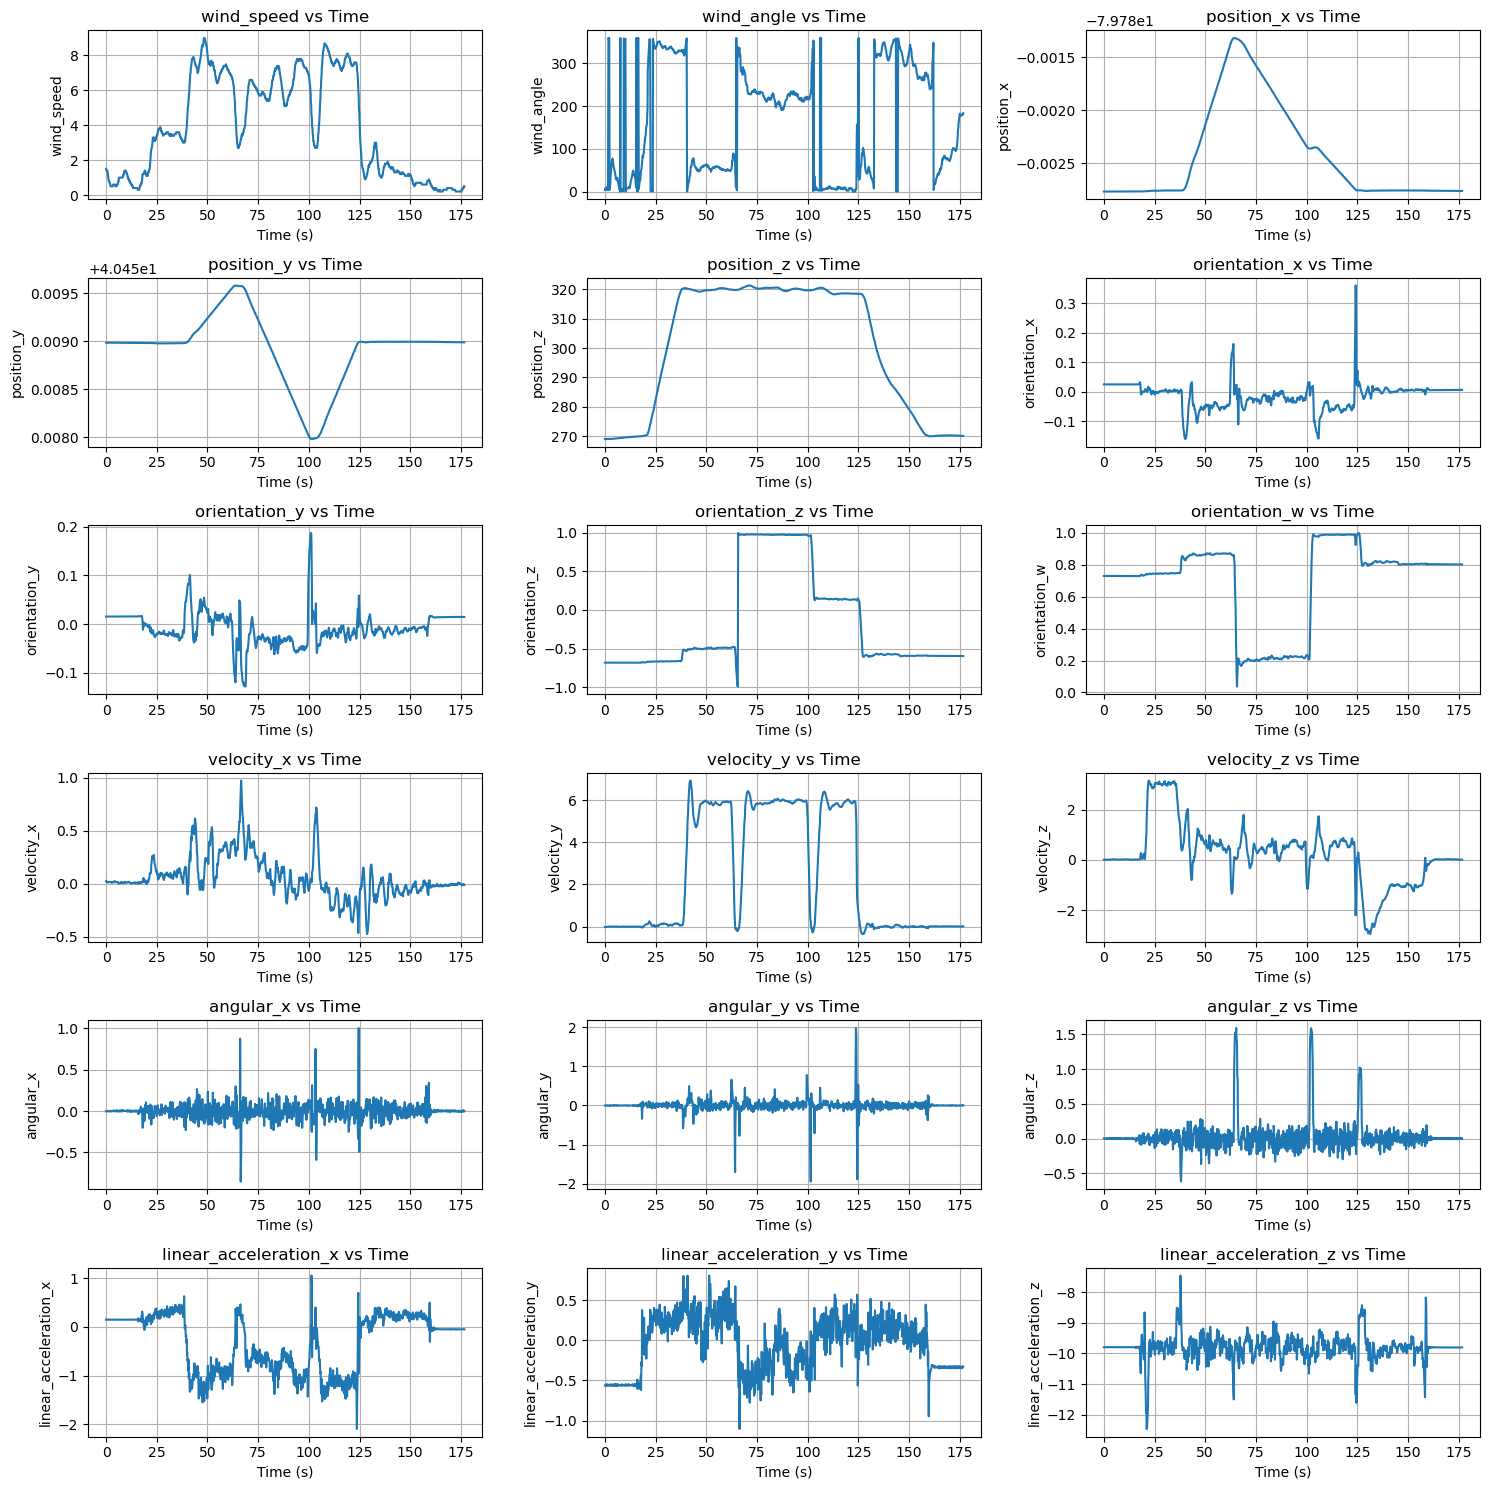

In [21]:
flight_154_clean = df_clean[df_clean['flight'] == 154]

var_to_filter = ['wind_speed', 'wind_angle', 
                 'position_x', 'position_y', 'position_z',
                 'orientation_x', 'orientation_y', 'orientation_z', 'orientation_w',
                 'velocity_x', 'velocity_y', 'velocity_z', 
                 'angular_x', 'angular_y', 'angular_z',
                 'linear_acceleration_x', 'linear_acceleration_y', 'linear_acceleration_z']

# Creating the subplot graph
fig, axs = plt.subplots(6, 3, figsize=(15, 15))

# Adjust the layout of subgraphs
axs = axs.ravel()  # Flatten the 2D array of axes to 1D

# Plotting each variable on a line graph
for i, var in enumerate(var_to_filter):
    axs[i].plot(flight_154_clean['time'], flight_154_clean[var]) 
    axs[i].set_title(f'{var} vs Time')
    axs[i].set_xlabel('Time (s)')
    axs[i].set_ylabel(var)
    axs[i].grid(True)

# Adjusting the layout to avoid overlapping
plt.tight_layout()
plt.show()

The graphs without any filtering clearly show a significant amount of noise in the data, with irregular fluctuations and spikes. These disturbances are likely due to sensor inaccuracies or environmental factors, which can distort the true underlying patterns of the variables. Such noise can negatively impact analysis and model performance, making it essential to apply appropriate filtering techniques.

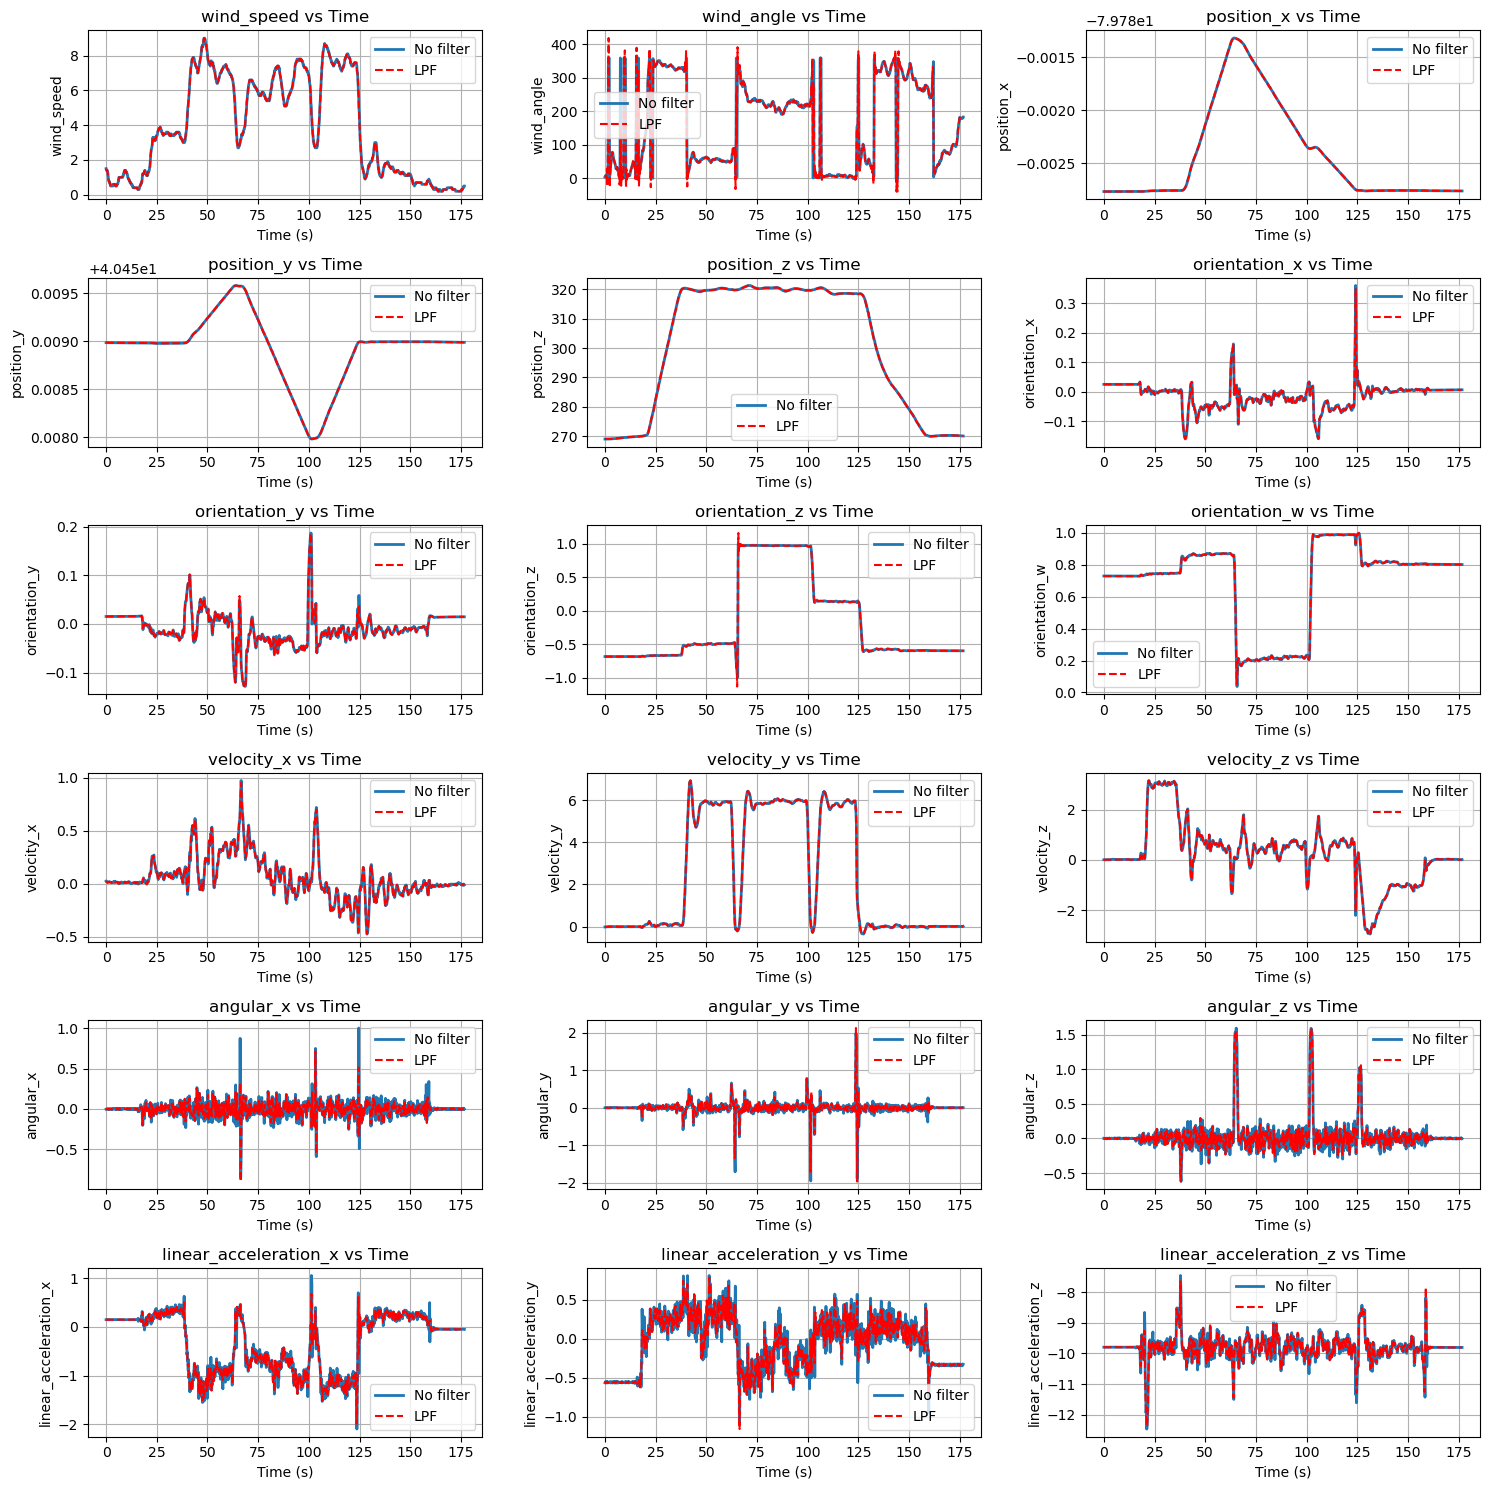

In [22]:
flight_154_clean = df_clean[df_clean['flight'] == 154]
flight_154 = df_flights[df_flights['flight'] == 154]

# Creating the subplot graph
fig, axs = plt.subplots(6, 3, figsize=(15, 15))

# Adjust the layout of subgraphs
axs = axs.ravel()  # Flatten the 2D array of axes to 1D

# Plotting each variable on a line graph
for i, var in enumerate(var_to_filter):
    axs[i].plot(flight_154_clean['time'], flight_154_clean[var], label='No filter', linewidth=2)
    filtered_var = butter_lowpass_filter(flight_154[var], cutOff, fs, order)
    axs[i].plot(flight_154['time'], filtered_var, label='LPF', color='red', ls='--') 
    axs[i].set_title(f'{var} vs Time')
    axs[i].set_xlabel('Time (s)')
    axs[i].set_ylabel(var)
    axs[i].grid(True)
    axs[i].legend()

# Adjusting the layout to avoid overlapping
plt.tight_layout()
plt.show()

After applying the filter and resampling, the data shows a significant improvement in clarity. The noise has been reduced, and the trends in the variables are more consistent and aligned with the expected patterns. This preprocessing ensures that the data is cleaner and more reliable for further analysis and modeling, leading to better performance in predictive tasks.

In [23]:
# Filter variables 
for var in var_to_filter:
    df_flights[var] = butter_lowpass_filter(df_flights[var], cutOff, fs, order)

## 3.6. Selecting Variables for Analysis

After the filtering process, the next step is to select the most relevant variables for analysis — specifically, those that are correlated with the drone's energy consumption. To achieve this, we will focus on variables that directly or indirectly influence the power consumption during flight, such as wind-related parameters, motion, and acceleration.

To better understand how these variables relate to power, we will generate scatter plots to visually analyze the correlation between each filtered variable and power.

This step is crucial because selecting the right variables directly impacts the performance of the prediction model, allowing us to focus on data that truly influence energy consumption while discarding irrelevant information.

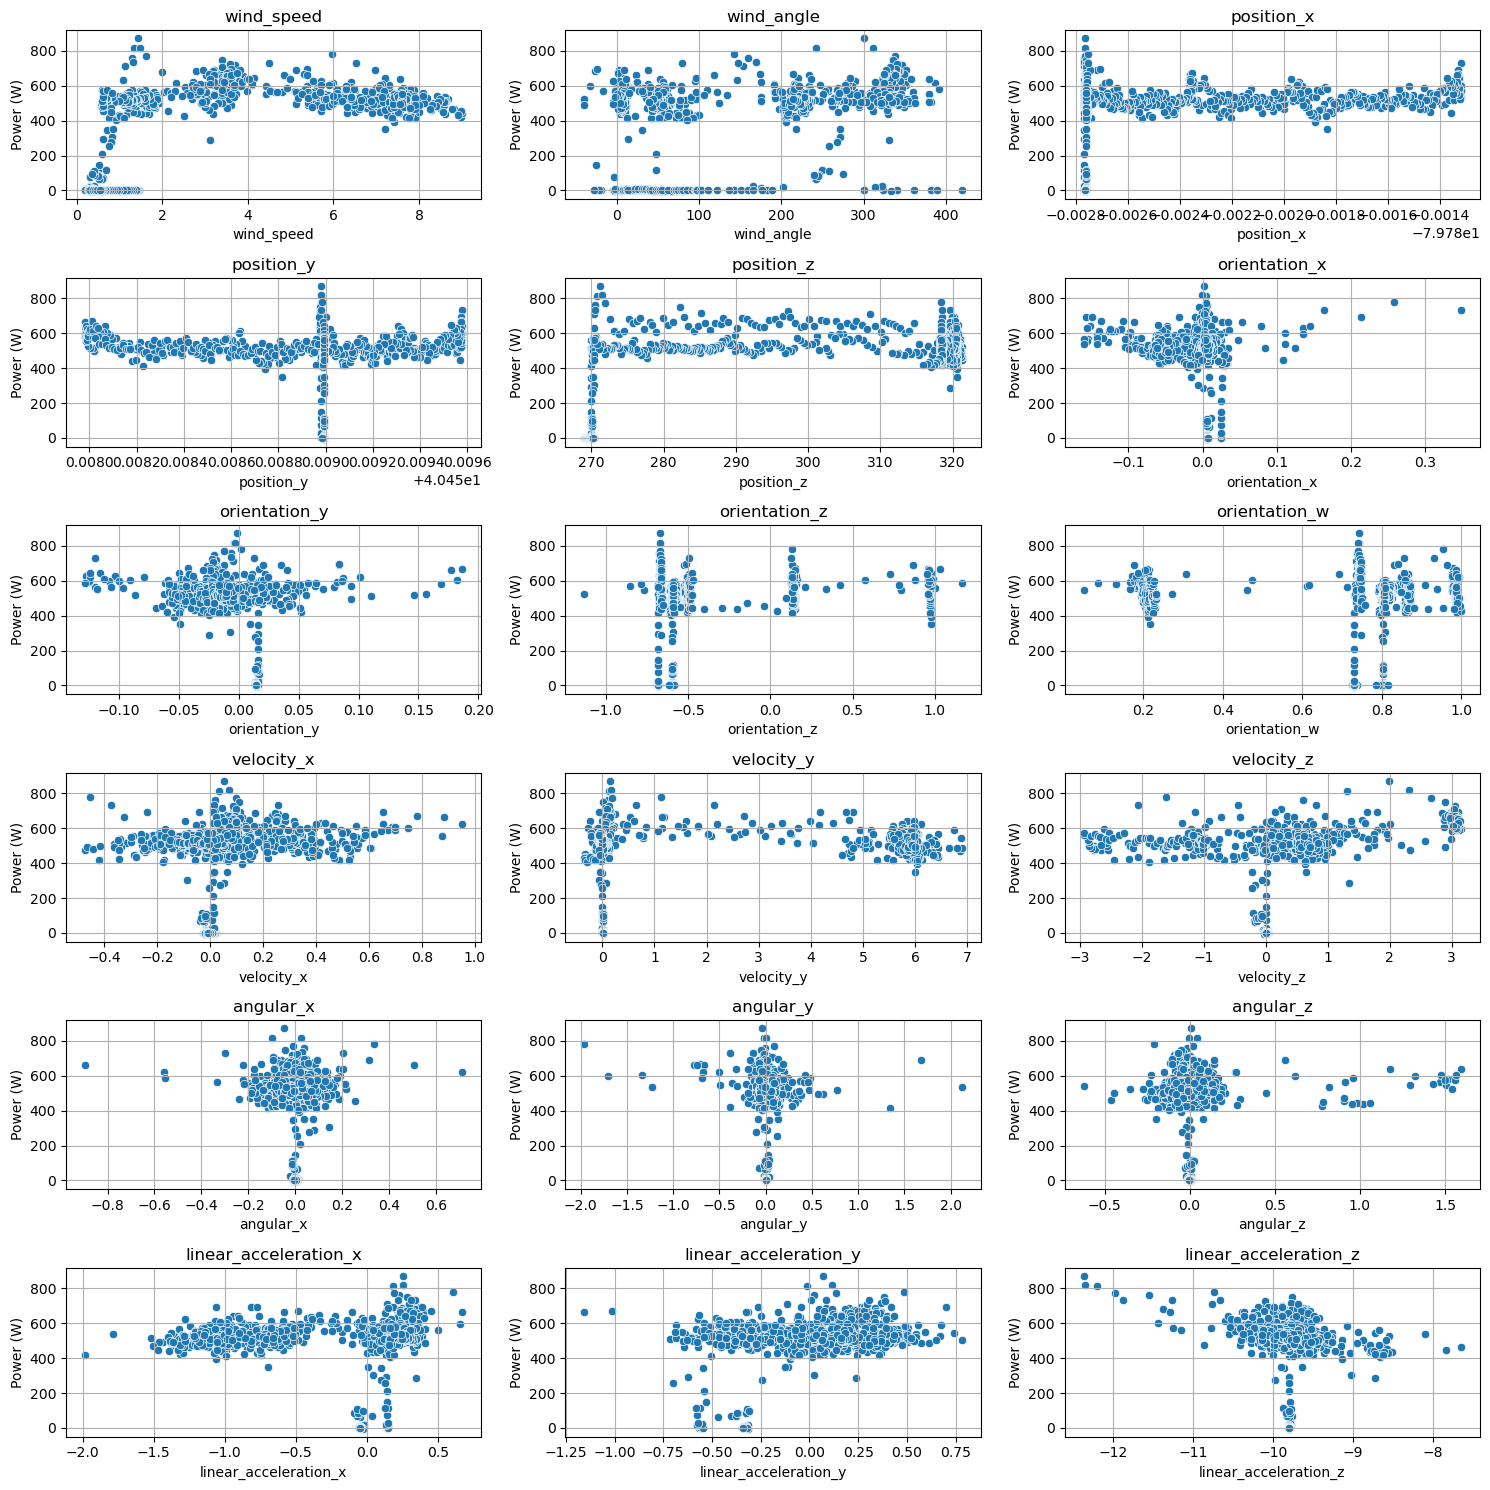

In [24]:
flight_154 = df_flights[df_flights['flight'] == 154]

# Create subplot
fig, axes = plt.subplots(6, 3, figsize=(15, 15)) 
axes = axes.flatten() 

# Plot the variables using scatterplot
for i, var in enumerate(var_to_filter):
    ax = axes[i]  # Access the corresponding graph
    sns.scatterplot(x=flight_154[var], y=flight_154['power_LPF'], ax=ax)
    ax.set_ylabel('Power (W)')  
    ax.set_xlabel(var)  
    ax.set_title(f'{var}') 
    ax.grid(True)  

# Adjust the layout so that the graphs do not overlap
plt.tight_layout()
plt.show()

From the scatter plots, it is possible to observe that some variables exhibit a noticeable relationship with the drone's power consumption, while others appear more scattered and less correlated. However, a visual inspection alone is not sufficient to quantify the strength of these relationships.

To deepen this analysis, we will use Pandas correlation function, which calculates the Pearson correlation coefficient. This coefficient measures the strength and direction of a linear relationship between two variables, providing a value between -1 and 1:

* Values close to 1 indicate a strong positive linear relationship.
* Values close to -1 indicate a strong negative linear relationship.
* Values near 0 indicate no significant linear relationship.

By applying this function, we will be able to quantify how strongly each variable is associated with power consumption, helping us identify the most relevant features to include in the prediction model.

wind_speed               0.459030
wind_angle               0.073569
position_x               0.308372
position_y              -0.063524
position_z               0.532187
orientation_x           -0.181129
orientation_y           -0.201602
orientation_z            0.170964
orientation_w            0.086476
velocity_x              -0.098344
velocity_y               0.326327
velocity_z               0.226575
angular_x               -0.006833
angular_y               -0.022221
angular_z                0.061120
linear_acceleration_x   -0.216703
linear_acceleration_y    0.079206
linear_acceleration_z   -0.113639
power_LPF                1.000000
Name: power_LPF, dtype: float64


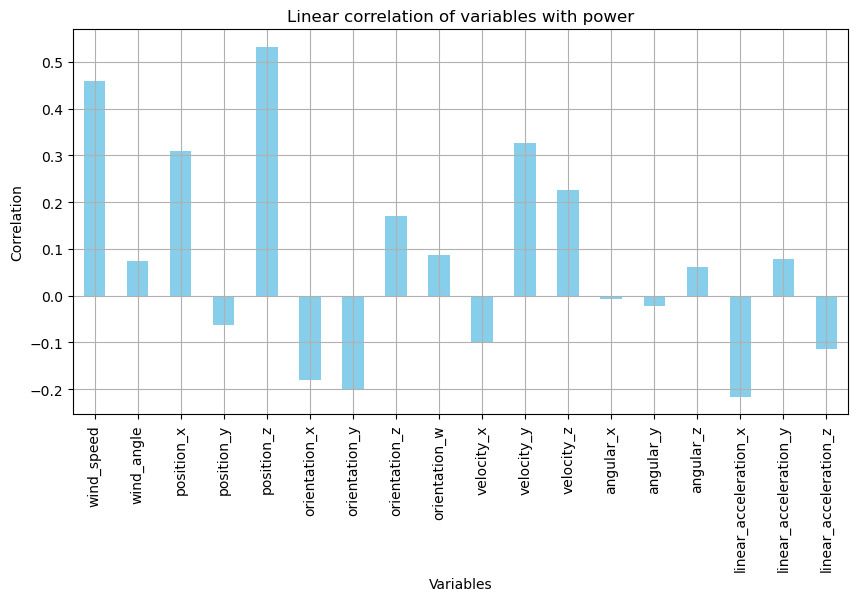

In [25]:
# Calculate correlation of only variables in var_to_filter with power
correlation_matrix = df_flights[var_to_filter + ['power_LPF']].corr()

# Filter correlations with power
correlation_with_power = correlation_matrix['power_LPF']

# Display correlations of var_to_analyze variables with power_FILT
print(correlation_with_power)

# Plotting correlation with power
plt.figure(figsize=(10, 5))
correlation_with_power.drop('power_LPF').plot(kind='bar', color='skyblue')  # Exclui 'power_FILT' da barra
plt.title('Linear correlation of variables with power')
plt.xlabel('Variables')
plt.ylabel('Correlation')
plt.grid(True)
plt.show()

Based on the analysis of the scatter plots and the linear correlation coefficients between the variables and power consumption, combined with logical reasoning about which parameters influence the drone’s energy use, we can simplify our dataset. This simplification involves removing variables with little to no correlation and combining related variables into more meaningful features. By reducing the number of parameters, we aim to make the model more efficient, focusing only on the most relevant data for predicting energy consumption:

* **flight**: This variable will be excluded from the training dataframe as it is not a direct predictor of power consumption. However, it remains important for data analysis, allowing us to group flights and compare real vs. predicted power, as well as analyze trends across different flight scenarios.
* **time**: The time variable will be kept as a temporal reference, essential to track the evolution of other variables during the flight. Although it is not a direct predictor of power consumption, it is important for the overall data structure and analysis.
* **wind_speed**: This variable will be kept, as it directly influences the drone's power consumption by affecting its stability and required thrust to maintain trajectory.
* **wind__angle**: The wind_angle variable will also be kept, since the direction of the wind relative to the drone's movement can significantly affect its energy consumption, especially when flying against or with the wind.
* **battery_voltage, battery_current**: Both will be excluded, since we are now using power, which already represents the product of these two variables and directly reflects energy consumption.
* **position_x, position_y, position_z**: These variables will be kept, as they represent the drone's spatial position, which could be important for understanding the drone's movement and energy consumption relative to its location in the flight.
* **orientation_x, orientation_y, orientation_z, orientation_w**: These variables will be excluded as they describe the orientation of the drone in quaternion form. Since the position and movement of the drone are already captured through other variables, these orientation variables do not contribute significantly to predicting energy consumption.
* **velocity_x, velocity_y, velocity_z**: These variables will be combined into a single variable, velocity_magnitude, which represents the total velocity of the drone in 3D space. This will be calculated by taking the square root of the sum of the squares of the individual velocity components: $$ \text{velocity\_magnitude} = \sqrt{\text{velocity\_x}^2 + \text{velocity\_y}^2 + \text{velocity\_z}^2} $$ By transforming the velocities into a single magnitude value, we simplify the data while maintaining the necessary information about the drone's movement. This is useful because the magnitude of velocity is a more direct and interpretable feature when analyzing energy consumption.
* **angular_x, angular_y, angular_z**: These variables will be excluded from the training dataset since their impact on power consumption is indirectly captured by other measured variables. Additionally, their high variability and potential noise could introduce unnecessary complexity to the model without significantly improving its predictive performance.
* **linear_acceleration_x, linear_acceleration_y, linear_acceleration_z**: The same that we did for the velocity, we will combine them into a single variable called linear_acceleration_magnitude, which will represent the total linear acceleration of the drone in 3D space. This will be calculated using the following formula: $$ \text{acceleration\_magnitude} = \sqrt{\text{linear\_acceleration\_x}^2 + \text{linear\_acceleration\_y}^2 + \text{linear\_acceleration\_z}^2} $$
* **speed**: This variable, representing the programmed speed, will be excluded since the actual velocity measurements from the drone's sensors (velocity_x, velocity_y, and velocity_z) provide more precise and dynamic information about the aircraft's movement. Keeping only the measured velocities ensures that the model is trained on real flight conditions rather than predefined parameters.
* **payload**: The payload, or the weight the drone is carrying, is an important factor affecting energy consumption. The more weight the drone carries, the more power it needs to maintain lift and stability during flight. By keeping this variable, we ensure that our predictive model accounts for the impact of the drone's load, which is crucial for estimating power usage and efficiency during different mission types.
* **altitude**: Similar to the speed variable, altitude will be excluded since we already have position_z, which directly represents the drone's altitude based on sensor measurements. Using position_z ensures that the model relies on actual recorded data rather than predefined or programmed values.
* **power**: The power variable can be excluded because it is redundant. We already have the power_FILT variable, which represents the filtered power values.
* **power_FILT**: This variable is our primary variable of interest, as it represents the filtered power values, which are crucial for analyzing the energy consumption of the drone. This variable was created by applying a median filter to the raw power data, effectively reducing noise and outliers.

In [26]:
# Calculate the magnitude of the total velocity (based on the velocity components)
df_flights['velocity_mag'] = np.sqrt(df_flights['velocity_x']**2 + df_flights['velocity_y']**2 + df_flights['velocity_z']**2)

# Calculate the magnitude of the total acceleration (based on the linear acceleration components)
df_flights['acceleration_mag'] = np.sqrt(df_flights['linear_acceleration_x']**2 + df_flights['linear_acceleration_y']**2 + df_flights['linear_acceleration_z']**2)

In [27]:
var_to_keep = ['flight', 'wind_speed', 'wind_angle',
               'position_x', 'position_y', 'position_z', 
               'payload', 'time', 'power_LPF',
               'velocity_mag', 'acceleration_mag']

df_analysis = df_flights[var_to_keep]

df_train = df_analysis.drop(columns='flight')

After selecting the relevant data and reducing the dataframes, we can now observe the new dataframe for training.

In [28]:
df_train.head()

,wind_speed,wind_angle,position_x,position_y,position_z,payload,time,power_LPF,velocity_mag,acceleration_mag
0,0.099986,12.031359,-79.782396,40.458047,269.332394,0.0,0.0,2.117019,0.017489,9.811871
1,0.101320,183.340510,-79.782396,40.458047,269.332679,0.0,0.2,2.363480,0.018824,9.810536
2,0.098137,341.885494,-79.782396,40.458047,269.334483,0.0,0.4,2.221713,0.017380,9.811299
3,0.101108,378.142584,-79.782396,40.458047,269.336320,0.0,0.6,2.031457,0.018915,9.812400
4,0.150987,325.214841,-79.782396,40.458047,269.336598,0.0,0.8,2.214244,0.016173,9.812965


The selection of variables for model training was carefully conducted to ensure that only relevant and meaningful features were included. By removing redundant or non-informative variables, such as programmed speed and altitude (which have direct sensor measurements), we streamlined the dataset for better predictive performance. Additionally, we excluded the flight variable from the training DataFrame while retaining it in a separate analysis dataset to facilitate comparisons between real and predicted power values.

Beyond variable selection, data preprocessing steps like resampling and low-pass filtering played a crucial role in improving data quality. Resampling at 0.2-second intervals ensured a consistent time reference across all flights, while filtering effectively reduced noise without distorting the overall signal structure. These steps collectively enhance the reliability of the dataset, creating a more robust foundation for training the predictive model.

# 4. Model Training

In this section, we focus on developing and evaluating predictive models for power consumption. After preprocessing the data through filtering and resampling, we now train machine learning models using the selected features. The goal is to build an accurate model that generalizes well to new flight data while minimizing errors. We will explore multiple models, compare their performance using key metrics, and fine-tune hyperparameters to enhance predictive accuracy.

## 4.1. Model Selection and Evaluation

To identify the best model for predicting power consumption, we train multiple machine learning models and evaluate their performance using key metrics such as MAE, MSE, and R². This step ensures that the selected model balances accuracy and generalization for future predictions.

First, we define X and y for model training. X consists of all selected input features, excluding the target variable, while y represents the target variable, which in this case is power_FILT (the filtered power measurement). This separation is essential for supervised learning, allowing the model to learn patterns from the input variables to predict power consumption effectively.

In [29]:
X = df_train.drop(columns='power_LPF')
y = df_train['power_LPF']

Second, we use the train_test_split function from scikit-learn to split the dataset into training and testing sets. We allocate 25% of the data for testing (X_test and y_test) and the remaining 75% for training (X_train and y_train). The random_state=42 ensures that the split is reproducible. This division allows us to train the model on one subset of the data and evaluate its performance on an unseen set, ensuring the model's generalization ability.

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In this step, we will evaluate four different regression models (Linear Regression, Random Forest, XGBoost, and MLP Regressor) to identify the two best-performing models based on key metrics. We will not tune the hyperparameters at this stage, but rather focus on testing the models with their default configurations. This allows us to evaluate their general performance before refining them further.

The following code block imports the necessary modules, sets up a dictionary of models, and runs each model through a pipeline that includes standardization (scaling) and training. The models are evaluated using three performance metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R²). After training, the results are stored in the results dictionary, and the trained pipelines are stored in pipelines for potential future use.

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

models = {'LinearRegression': LinearRegression(),
          'MLPRegressor': MLPRegressor(),
          'RandomForest': RandomForestRegressor(),
          'XGBRegressor': XGBRegressor()}

pipelines = {}  # Dictionary to store trained pipelines
results = {}    # Dictionary to store model performance metrics

for name, model in models.items():
    # Create a pipeline with scaling and the model
    pipeline = Pipeline([('scaler', StandardScaler()),  # Apply feature scaling
                         ('model', model)])             # Apply the model

    # Fit the model to the training data
    pipeline.fit(X_train, y_train)

    # Predict the target on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the trained pipeline and performance metrics
    pipelines[name] = pipeline
    results[name] = {'MAE': mae, 'MSE': mse, 'R2': r2}

In [32]:
# Show results
results_df = pd.DataFrame(results).T
results_df

,MAE,MSE,R2
LinearRegression,151.437931,31380.083007,0.417371
MLPRegressor,38.914251,3450.455435,0.935936
RandomForest,23.355301,1570.342939,0.970844
XGBRegressor,26.570504,1821.786402,0.966175


The model performance analysis was conducted using three key metrics: MAE (Mean Absolute Error), MSE (Mean Squared Error), and R² (Coefficient of Determination).

* **MAE (Mean Absolute Error):** This metric measures the average absolute errors between the predictions and the actual values. Lower MAE values indicate better model accuracy. Models with lower MAE values perform better, indicating that Random Forest and XGBRegressor provided more accurate predictions compared to the other models.

* **MSE (Mean Squared Error):** MSE calculates the average of the squared errors, penalizing larger deviations more heavily. Similar to MAE, lower MSE values reflect better model performance. Random Forest outperformed other models in terms of MSE, followed closely by XGBRegressor.

* **R² (Coefficient of Determination):** This metric measures the proportion of variance in the data that the model is able to explain. Higher R² values indicate better model effectiveness in capturing data variability. Random Forest and XGBRegressor demonstrated the highest R² values, indicating they were the most effective models in explaining the variance in the data.

To visually assess the power predictions, we can plot graphs showing both the actual power (ground truth) and the predicted power for each of the four selected models. For this evaluation, we have chosen Flight 154 as the test flight. By comparing the predicted power against the actual power, we can better understand how well each model performs in terms of power prediction.

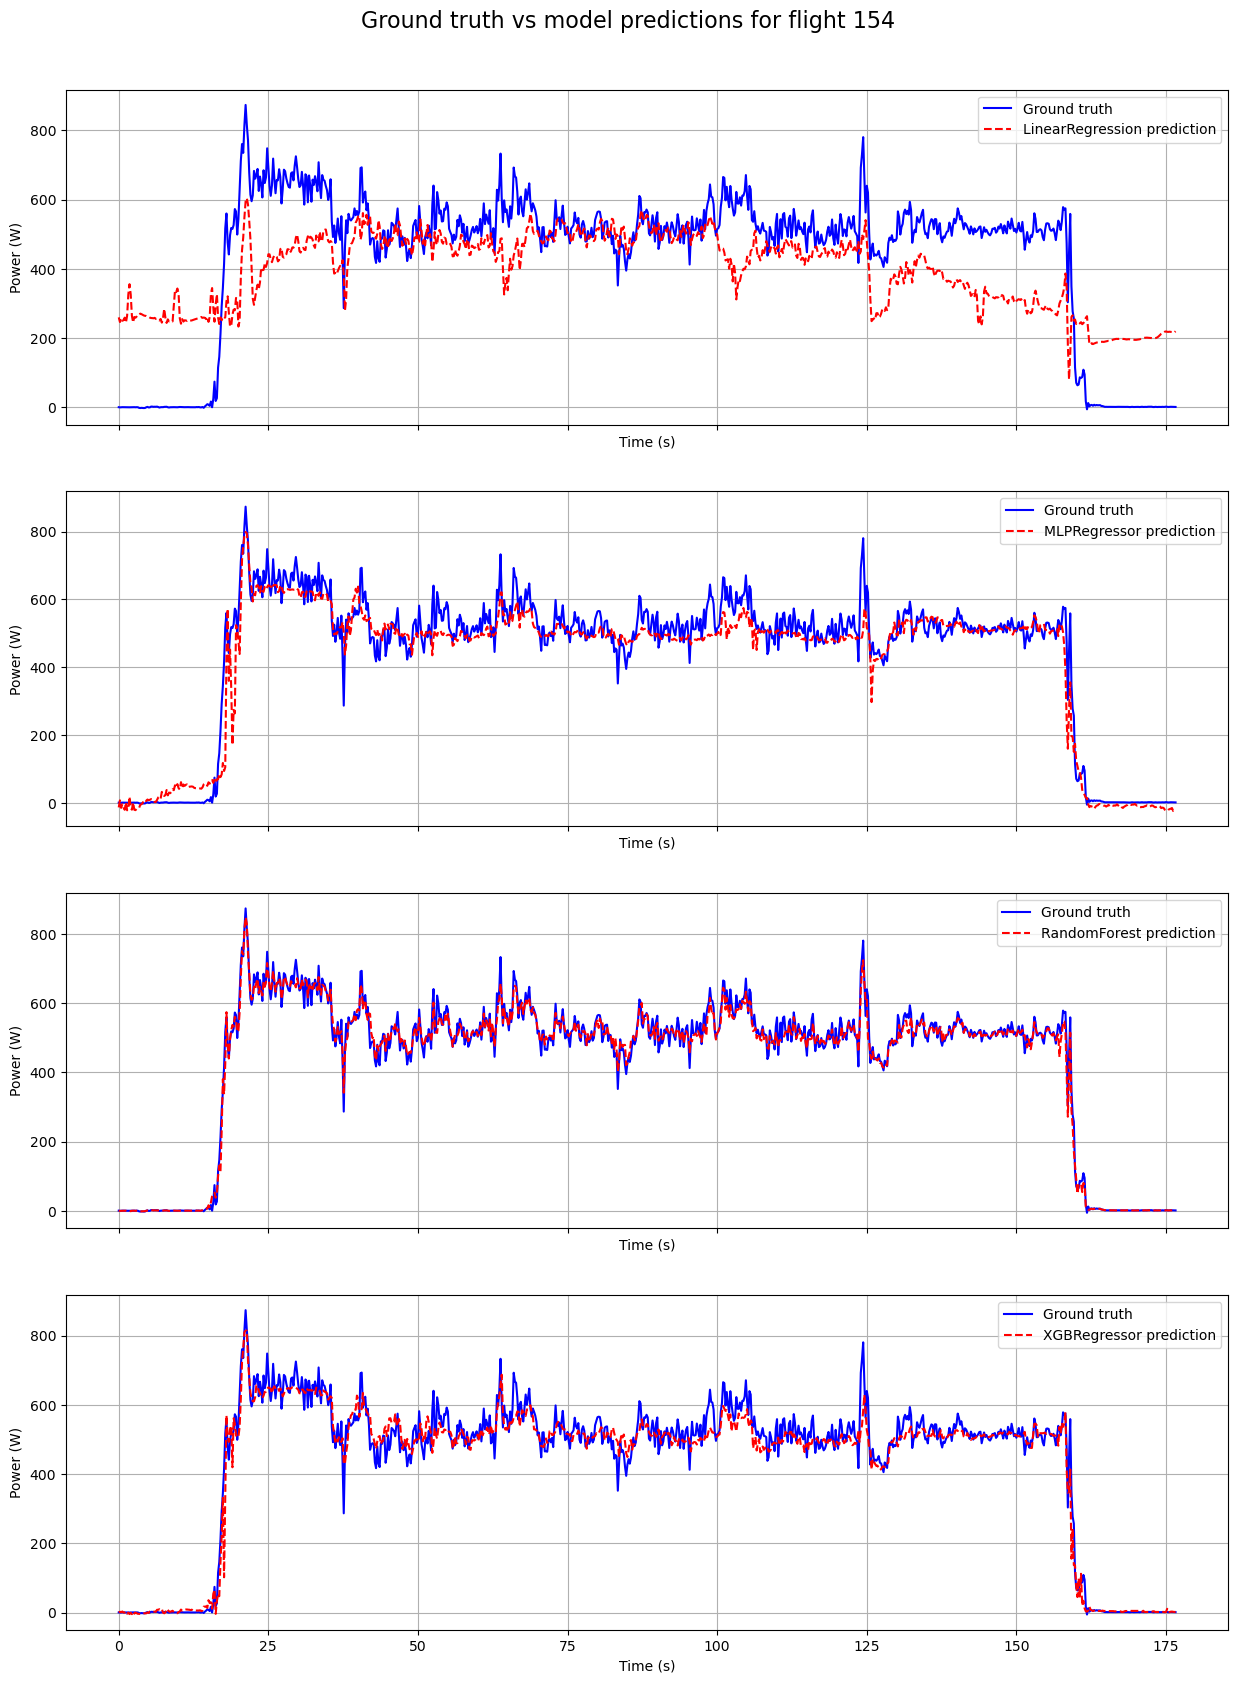

In [33]:
# Filter data for flight 154
flight_154 = df_analysis[df_analysis['flight'] == 154]

# Set X to flight 154 (removing unnecessary columns)
X_flight_154 = flight_154.drop(columns=['power_LPF', 'flight'])

# Set y_real based on filtered power
y_real = flight_154['power_LPF']

# Create the subplot with 4 rows and 1 column
fig, axs = plt.subplots(4, 1, figsize=(15, 20), sharex=True)

# Loop to plot graphs for each model
for i, (name, pipeline) in enumerate(pipelines.items()):
    # Predict with the model
    y_pred = pipeline.predict(X_flight_154)

    # Plot on graph
    axs[i].plot(flight_154['time'], y_real, label='Ground truth', color='blue')
    axs[i].plot(flight_154['time'], y_pred, label=f'{name} prediction', color='red', linestyle='--')
    axs[i].set_ylabel('Power (W)')
    axs[i].set_xlabel('Time (s)')
    axs[i].legend(loc='upper right')
    axs[i].grid(True)

plt.suptitle('Ground truth vs model predictions for flight 154', fontsize=16, y=0.92)

# Show the graphs
plt.show()

Based on the performance metrics and on the graphs, **Random Forest** and **XGBRegressor** were selected for the next stages of the process, as they offer the best balance of error and ability to explain data variability. These models demonstrated superior prediction accuracy compared to Linear Regression and MLPRegressor, which showed weaker performance across all metrics.

## 4.2. Hyperparameter Tuning for Model Optimization

Once the models have been selected based on their performance metrics, the next crucial step in improving their predictive accuracy is hyperparameter tuning. Hyperparameters are the parameters that are set before the learning process begins and significantly impact the model's performance. In this phase, we will perform a systematic search to find the best combination of hyperparameters for each selected model, aiming to enhance their performance on unseen data. This is done using techniques like Grid Search and Cross-Validation, which allow us to evaluate different combinations of parameters and select the optimal ones for model training. By fine-tuning these hyperparameters, we can improve the model's ability to generalize, resulting in better predictions.

For the hyperparameter optimization, we will use **Mean Squared Error (MSE)** as the primary metric for selecting the best combination of hyperparameters. The reason for this choice is that MSE not only penalizes larger deviations in the predictions more significantly, which is critical when predicting energy consumption, but it also aligns with the goal of minimizing large prediction errors, which could lead to substantial discrepancies in energy usage estimates. Therefore, MSE provides a more robust evaluation for the models and ensures that the energy predictions are as accurate as possible.

In [34]:
# Exporting df train to hyperparameter tuning
df_train.to_csv('df_train.csv', index=False)

### 4.2.1. Random Forest Regressor

For the Random Forest model, we focused on hyperparameter tuning to optimize its performance. A random forest is a meta estimator that fits a number of decision tree regressors on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control overfitting. It's a versatile and robust ensemble learning method that combines multiple decision trees to improve accuracy and reduce overfitting.

To test and optimize the hyperparameters of the Random Forest model, we used the GridSearchCV function. This method performs an exhaustive search over a specified parameter grid, evaluating the model’s performance for each combination of hyperparameters. The GridSearchCV allows us to automatically find the best set of parameters based on a chosen performance metric such as mean squared error (MSE).

Since the hyperparameter tuning process is computationally expensive and can take a considerable amount of time, the code used for this optimization was placed in a separate file. This approach prevents overloading this section of the analysis and allows us to handle the time-consuming simulation more efficiently. By running this task in a separate environment, we ensure smoother execution of the current analysis and avoid unnecessary delays, especially considering the large parameter grid and extensive evaluation process required for optimal tuning.

For hyperparameter tuning of the Random Forest model, we selected the following key parameters:

* **n_estimators:** This parameter controls the number of trees in the forest. We tested values of 200, 500, and 1000 to find the optimal number of trees that balances model performance and computational efficiency. A larger number of trees generally improves performance but increases computation time.

* **max_depth:** This parameter defines the maximum depth of each tree in the forest. We evaluated depths of 2, 5, and 7 to control the complexity of the trees. Limiting the depth helps prevent overfitting, while deeper trees can capture more intricate patterns in the data.

* **min_samples_leaf:** This parameter specifies the minimum number of samples required to be at a leaf node. We tested values of 2, 16, and 64 to determine the best balance between model flexibility and generalization. Smaller values allow the model to capture finer details in the data, while larger values make the model more robust and less prone to overfitting.

This is the code that we used for finding the best hyperparameters:

```python
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators": [200, 500, 1000],
              "max_depth": [2, 5, 7],
              "min_samples_leaf": [2, 16, 64]}

# Defining the base model
rf = RandomForestRegressor()

# Defining GridSearch with MSE as the evaluation metric
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')

# Training GridSearch
grid_search.fit(X_train, y_train)

# Best model found
best_rf = grid_search.best_estimator_

# Transform the result into a DataFrame for easy viewing
results_rf_df = pd.DataFrame(grid_search.cv_results_)

# Saving the df
results_rf_df.to_csv('results_rf.csv', index=False)
```

In [37]:
results_rf_df = pd.read_csv('results_rf.csv')

# Sorting the DataFrame by 'rank_test_score'
results_rf_df.sort_values(by='rank_test_score', ascending=True).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
18,93.675037,0.908540,0.296035,0.005278,7,2,200,"{'max_depth': 7, 'min_samples_leaf': 2, 'n_est...",-3093.386052,-3166.440687,-3148.452340,-3136.093026,31.078496,1
20,465.251215,2.018267,1.462795,0.012861,7,2,1000,"{'max_depth': 7, 'min_samples_leaf': 2, 'n_est...",-3091.882067,-3170.878690,-3148.678492,-3137.146416,33.265179,2
19,234.525972,2.486195,0.732468,0.007850,7,2,500,"{'max_depth': 7, 'min_samples_leaf': 2, 'n_est...",-3090.732759,-3170.903488,-3151.636434,-3137.757560,34.169224,3
23,461.506699,1.344373,1.495395,0.037313,7,16,1000,"{'max_depth': 7, 'min_samples_leaf': 16, 'n_es...",-3145.112673,-3203.326628,-3196.045627,-3181.494976,25.897326,4
22,231.016731,0.273431,0.735741,0.008511,7,16,500,"{'max_depth': 7, 'min_samples_leaf': 16, 'n_es...",-3148.880806,-3203.319756,-3192.390161,-3181.530241,23.513871,5


In [45]:
# Choosing the best model of rf based on the test
best_rf = RandomForestRegressor(max_depth=7, min_samples_leaf=2, n_estimators=200)

# Fit model
best_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, min_samples_leaf=2, n_estimators=200)

In [51]:
# Flights to analyze
flight_5 = df_analysis[df_analysis['flight'] == 5]
flight_154 = df_analysis[df_analysis['flight'] == 154]
flight_252 = df_analysis[df_analysis['flight'] == 252]

# Set X 
X_flight_5 = flight_5.drop(columns=['power_LPF', 'flight'])
X_flight_154 = flight_154.drop(columns=['power_LPF', 'flight'])
X_flight_252 = flight_252.drop(columns=['power_LPF', 'flight'])

# Set y_real 
y_real_5 = flight_5['power_LPF']
y_real_154 = flight_154['power_LPF']
y_real_252 = flight_252['power_LPF']

# Predict flights
y_pred_5 = best_rf.predict(X_flight_5)
y_pred_154 = best_rf.predict(X_flight_154)
y_pred_252 = best_rf.predict(X_flight_252)

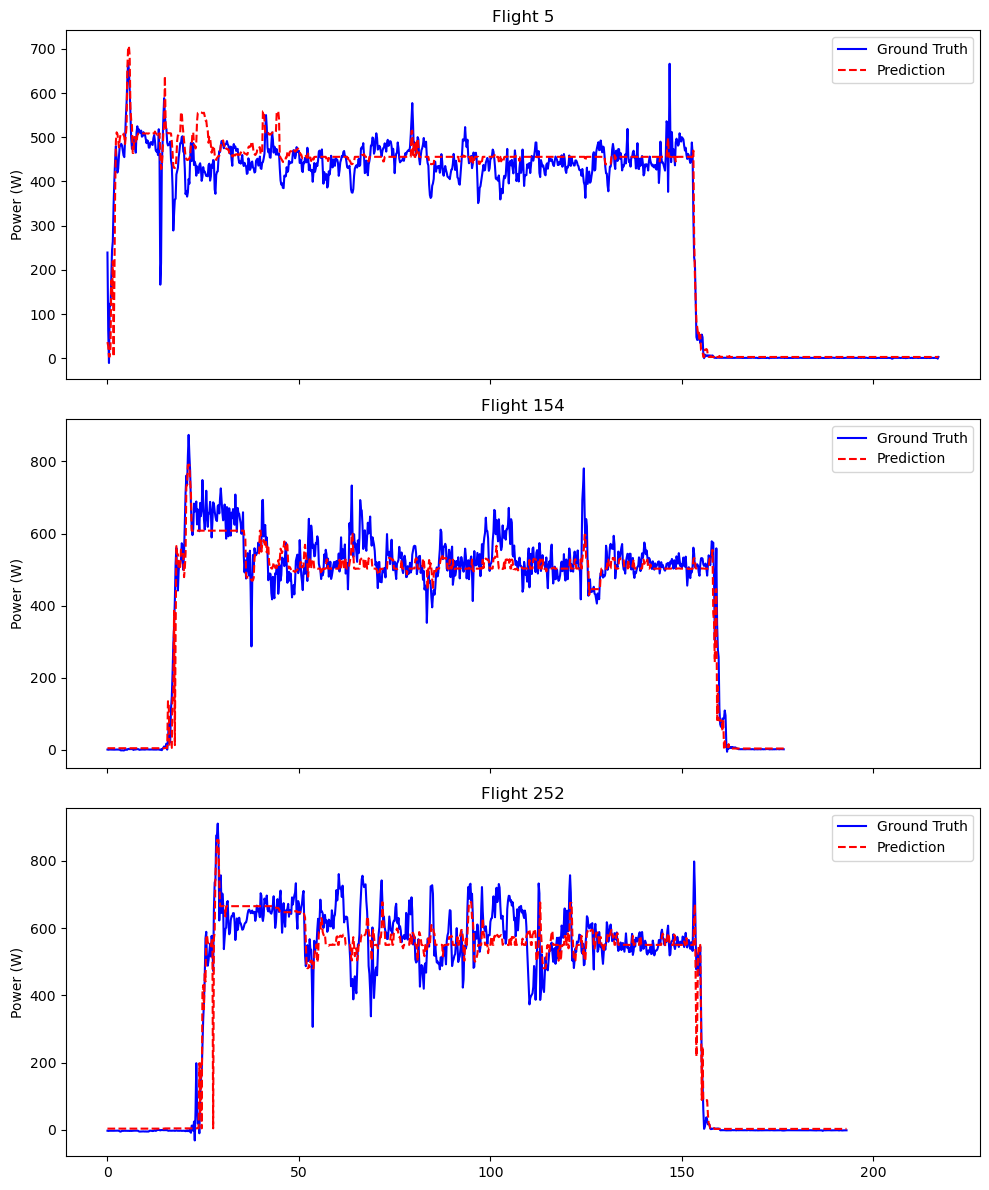

In [52]:
# Criando subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# Lista de voos e previsões
flights = [(flight_5, y_real_5, y_pred_5, "Flight 5"),
           (flight_154, y_real_154, y_pred_154, "Flight 154"),
           (flight_252, y_real_252, y_pred_252, "Flight 252")]

# Iterando sobre os voos e plotando os dados
for i, (flight, y_real, y_pred, title) in enumerate(flights):
    axs[i].plot(flight['time'], y_real, label="Ground Truth", color="blue")
    axs[i].plot(flight['time'], y_pred, label="Prediction", color="red", linestyle="--")
    axs[i].set_ylabel("Power (W)")
    axs[i].set_title(title)
    axs[i].legend()

# Ajustando layout
plt.tight_layout()
plt.show()